# Plotting More Complicated Histograms 

Check the latest matplotlib documentation at https://matplotlib.org/contents.html to find out more about the options on each of the commands.

In [5]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

n = 10000
r1 = random.rand(n) * 6         # uniformly distributed random values between 1 and 6
r2 = random.randn(n) * 1.5 + 3  # normally distributed random values, mean 3, SD 1.5
r3 = random.randint(1,7,n)      # uniformly distributed random integers between 1 and 6

## Customize the Bin Widths, etc.
The examples below explore some additional plotting capabilities you may find interesting, but won't need for MECH 217.

This sample shows several other more advanced things besides customizing bin widths. Ask yourself which plots actually represent the data clearly. Which mark is given to more students, A or B?

N and bins are fairly easy to figure out, but patches gets a little more complicated. Every shape drawn on the plot is a "patch" and you can find out much more by googling "pyplot patches". I took a look and decided I didn't need to know all the details!

(array([2.400e+01, 1.730e+02, 7.610e+02, 2.154e+03, 2.985e+03, 2.444e+03,
        1.120e+03, 3.000e+02, 3.800e+01, 1.000e+00]),
 array([-2.44087666, -1.26587197, -0.09086729,  1.08413739,  2.25914207,
         3.43414676,  4.60915144,  5.78415612,  6.9591608 ,  8.13416549,
         9.30917017]),
 <a list of 10 Patch objects>)

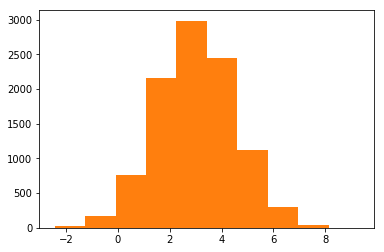

In [6]:
N,bins,patches = hist(r2)  # the line from most examples
hist(r2)   # the first array is a list of counts and the second is the bin boundaries

## Create some data to plot as histograms. Give students marks with about a B average and a reasonable distribution. 

In [7]:
marks = random.randn(n) * 12 + 75   # an imaginary range of student percentage marks
for i in range(0,n): 
    marks[i] = min(marks[i],100)       # that can't be larger than 100
    marks[i] = max(marks[i],0)         # or smaller than 0
mean(marks)

74.99644592641346

## Use the figure capability to make multiple subplots with different bin widths, colours and labels.

(array([0.000386, 0.00876 , 0.02288 , 0.03244 , 0.016995]),
 array([  0,  50,  60,  70,  80, 100]),
 <a list of 5 Patch objects>)

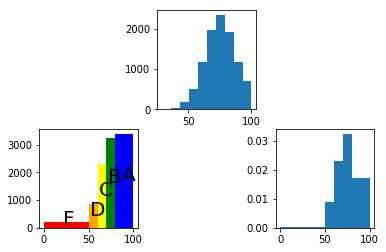

In [8]:
b=[0,50,60,70,80,100]    # bin by round letter grade boundaries
l=['F','D','C','B','A']

# you need to create a figure to do some of the more complex elements in plotting
fig = figure()
ax = fig.add_subplot(234) # ax will be the 4th set of axes in a fig layout of 2 rows by 3 cols 
N,bins,patches = ax.hist(marks,bins = b)
patches[0].set_facecolor('red')
patches[1].set_facecolor('orange')
patches[2].set_facecolor('yellow')
patches[3].set_facecolor('green')
patches[4].set_facecolor('blue')
for i in range(0,5):
    ax.text((b[i+1]+b[i])/2-3,N[i]/2,l[i],size = 20)

ax2 = fig.add_subplot(232)
ax2.hist(marks)

ax6 = fig.add_subplot(236)
ax6.hist(marks,bins=b,density=True)



## Exercise caution with histograms!
Note that how you present your data makes a difference to the impression, especially if you mess with the bin widths. The normalized plot gives me a better picture of the reality of marks distribution, while the plot of counts emphasizes artifacts of the binning used to turn percentages into letter grades. There are more students with A- than with B+ because B+ includes only 3% of the range (77.0-79.9) while A- includes 5% of the range (80.0-84.9). The F block looks disproportionately large in the second plot because the area hasn't been normalized to give the right visual impression. 

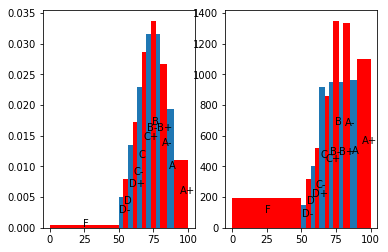

In [9]:
b=[0,50,53, 57, 60,  63,  67, 70,  73,  77, 80,  85,  90, 100]   # bin to fine scale
l=['F','D-','D','D+','C-','C','C+','B-','B','B+','A-','A','A+']
fig = figure()
ax = fig.add_subplot(121)
N,bins,patches = ax.hist(marks,bins=b,density=True)
for i in range(0,13):
    ax.text((b[i+1]+b[i])/2-1,N[i]/2,l[i])
    if (int(i/2)*2 == i): patches[i].set_facecolor('red')
axc = fig.add_subplot(122)
N,bins,patches = axc.hist(marks,bins=b)
for i in range(0,13):
    axc.text((b[i+1]+b[i])/2-1,N[i]/2,l[i])
    if (int(i/2)*2 == i): patches[i].set_facecolor('red')
